In [1]:
from nls import *
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import torch
from reskan.Model import *
from reskan.Group_STR import *

In [2]:
seed = 6666
set_seed(seed)

In [3]:
params = {"b_func": lambda x: 0.5*sp.sin(0.5*x), "l_func": lambda x: 0.5*sp.sin(0.5*x), "d_func": lambda x: 0, "eta": 1.8 + 0.6*sp.I, "eta0": 0, "C0": 1, "C1": 1}
#params = {"b_func": lambda x: 1, "l_func": lambda x: sp.exp(-0.4*sp.cos(x)), "d_func": lambda x: 0.2*sp.sin(x), "eta": 1.8, "eta0": 0.05, "C0": 1, "C1": 1}

t_range = (-4, 4)
x_range = (-8, 8)
t_steps = 100
x_steps = 200
point_r = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'

input_r, input_k, U_r, x = generate_data(t_range, x_range, t_steps, x_steps, point_r, params, device, noise=0.1)

# Display the generated data
print(input_r.shape)
print(input_k.shape)
print(U_r.shape)

torch.Size([1000, 2])
torch.Size([20000, 2])
torch.Size([1000, 1])


In [4]:
rhs_des = [
    'u',                   
    'u_{x}',              
    'u_{xx}',           
    'u_{xxx}',         
    'u_{xxxx}',        
    'u^2',             
    'u^3',              
    'u_{x}^2',             
    'u_{x}^3',             
    'u * u_{x}',           
    'u * u_{xx}',          
    'u_{x} * u_{xx}',      
    '|u|',                 
    '|u|^2',               
    '|u|^3',               
    '|u| * u',             
    '|u|^2 * u',       
    '|u|^3 * u_{xx}',      
    'u_{xxx} * u_{xx}',    
    'u_{xxxx} * u_{x}',    
]


In [5]:
Nd = 50  
Nh = 3   
Nb = 4   

model = VC_PIKAN(Nd=Nd, Nh=Nh, Nb=Nb, rhs_des=rhs_des, range_x=x_range, range_t=t_range, output_dim=2, seed=1234, grid=5, device=device)
model.fit(input_r, input_k, U_r, steps=300, alpha=0.1, lam=0.1, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True)

checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0


<All keys matched successfully>

Original:
After pruning:
saving model version 0.1


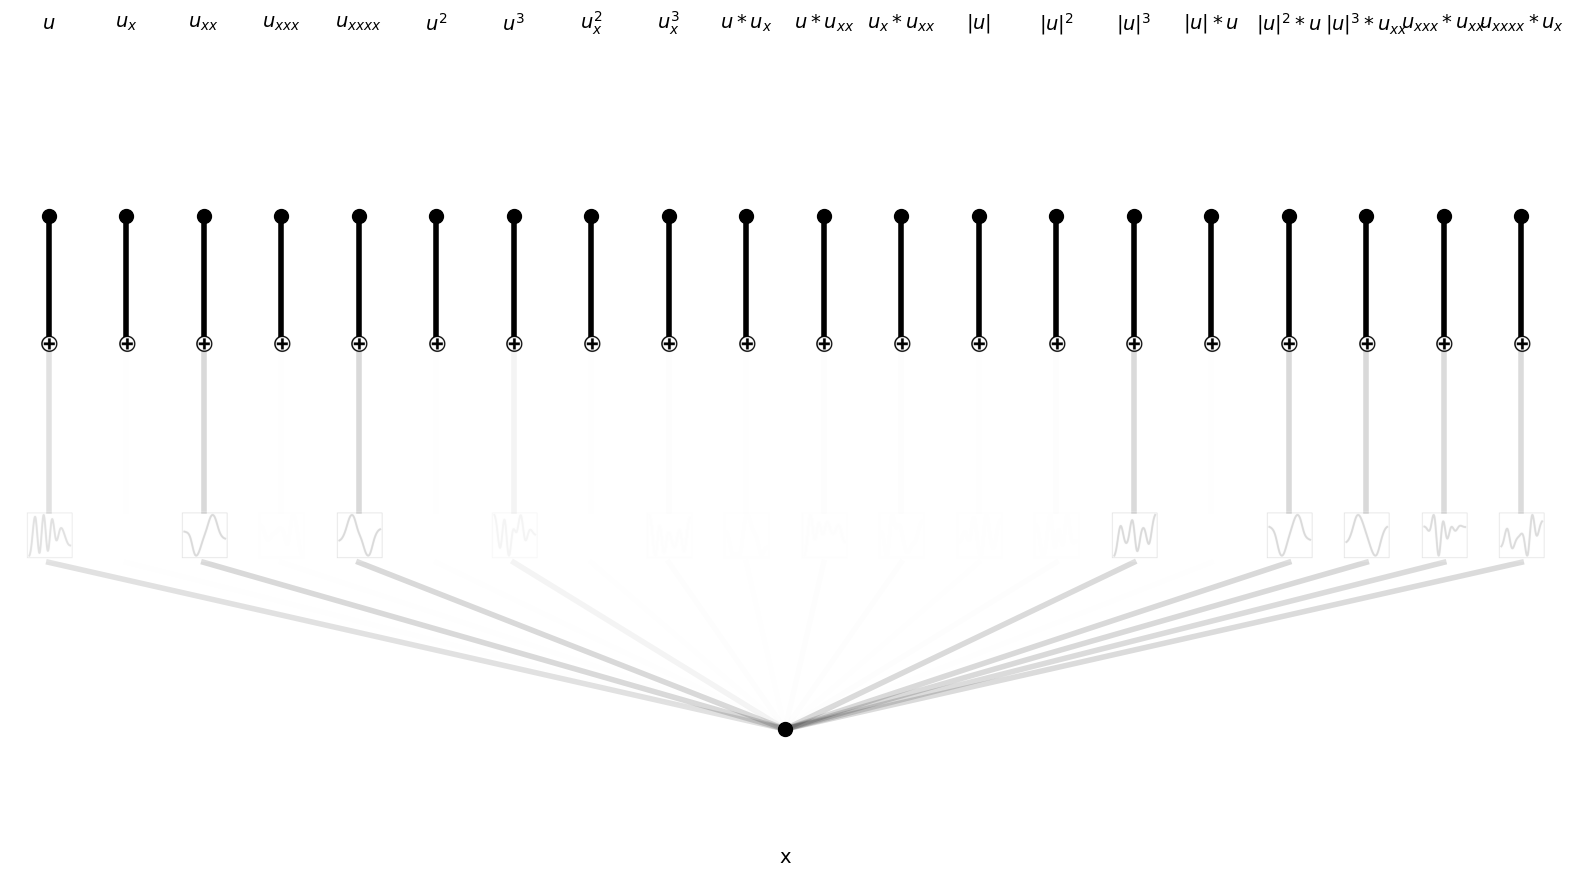

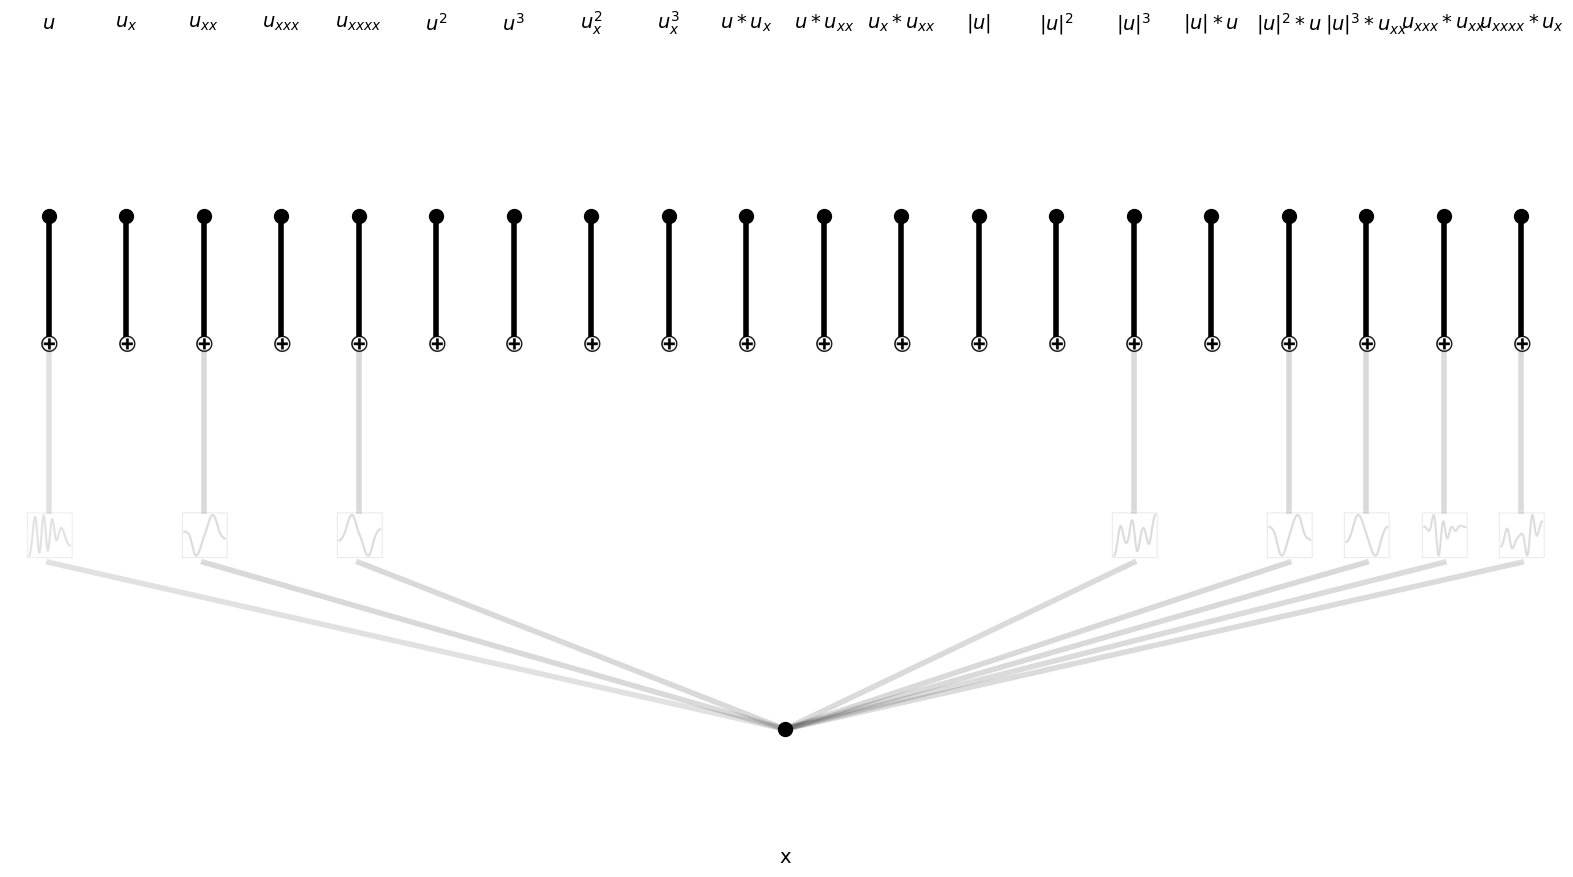

In [6]:
model.prune_kan(input_k)

saving model version 0.2


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


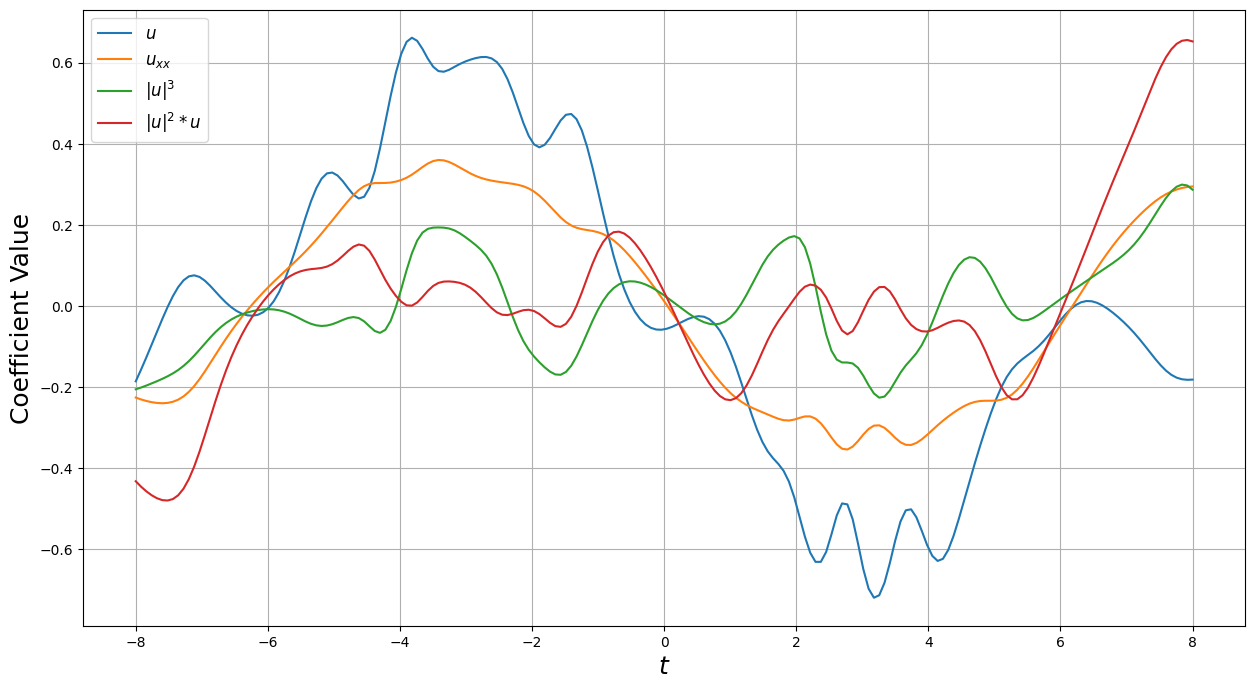

Plot saved as vc_plot/nls1_iter1.pdf


In [7]:
lam = 1e-5
d_tol = 40
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls1_iter1")

saving model version 0.3
saving model version 0.4
saving model version 0.5
saving model version 0.6


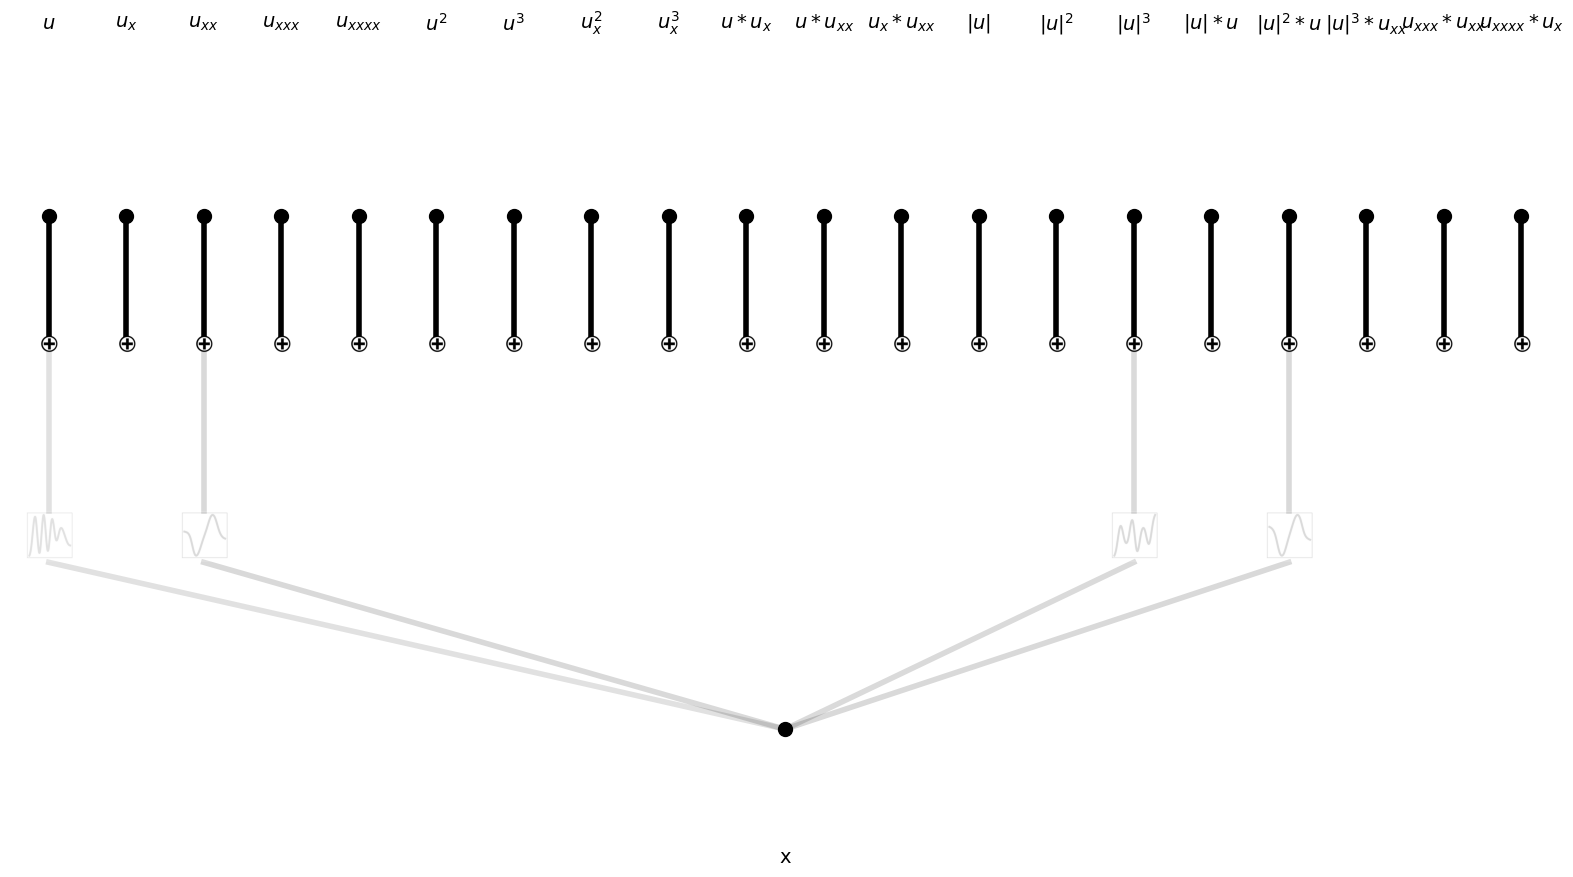

In [8]:
model.active_remove_edge(4)
model.active_remove_edge(17)
model.active_remove_edge(18)
model.active_remove_edge(19)
model.kan_plot()

In [6]:
model.fit(input_r, input_k, U_r, steps=100, alpha=0.1, lam=0.1, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls1_iter2')

<All keys matched successfully>

Original:
After pruning:
saving model version 0.1


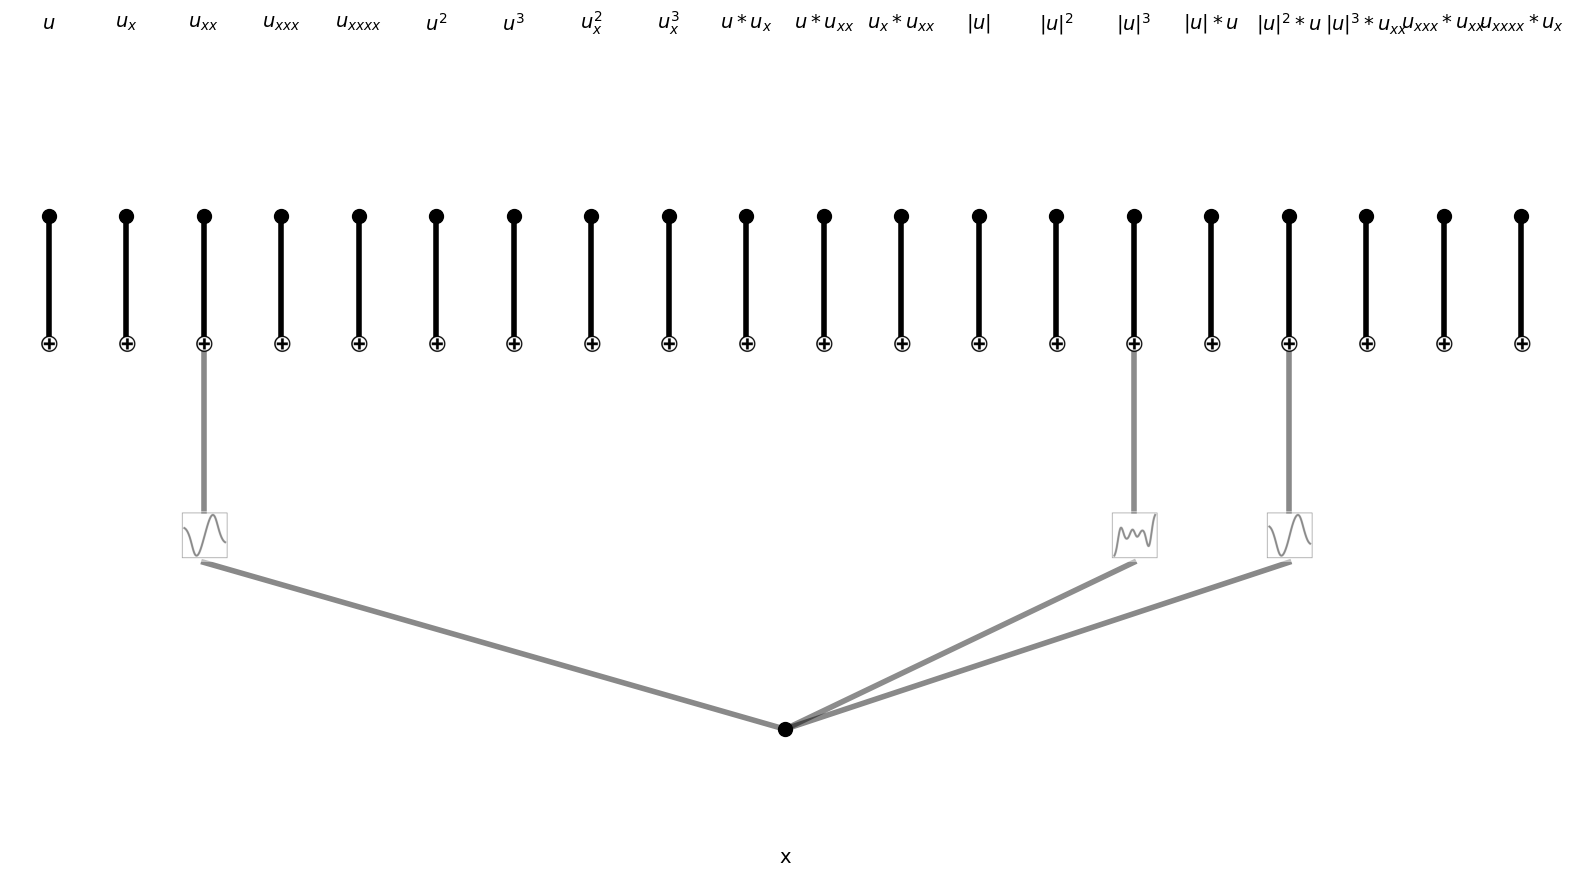

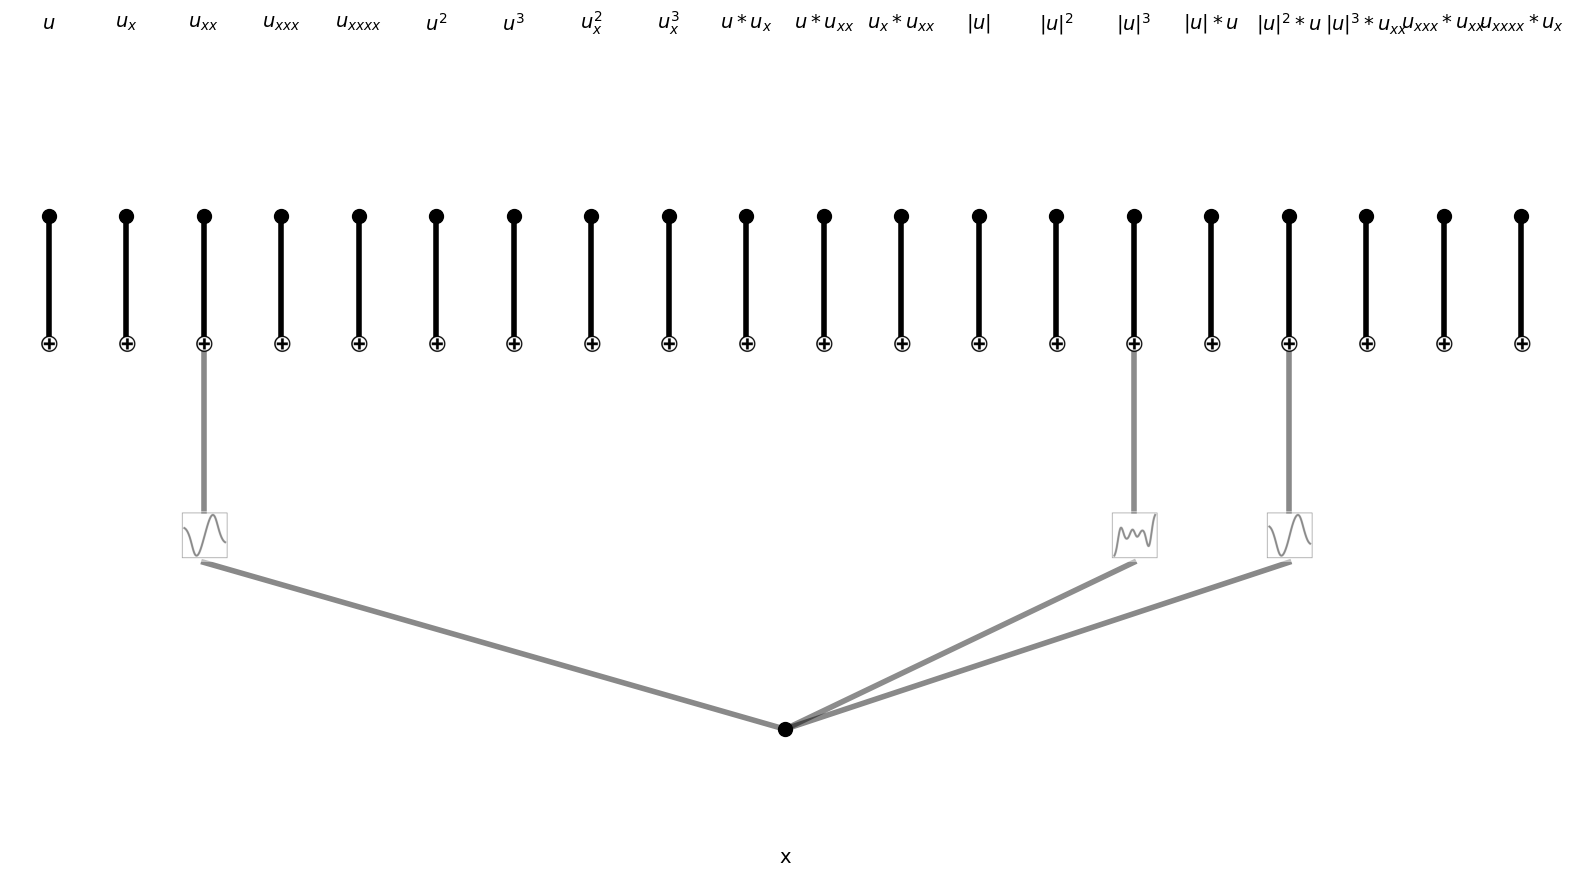

In [7]:
model.prune_kan(input_k)

saving model version 0.1


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


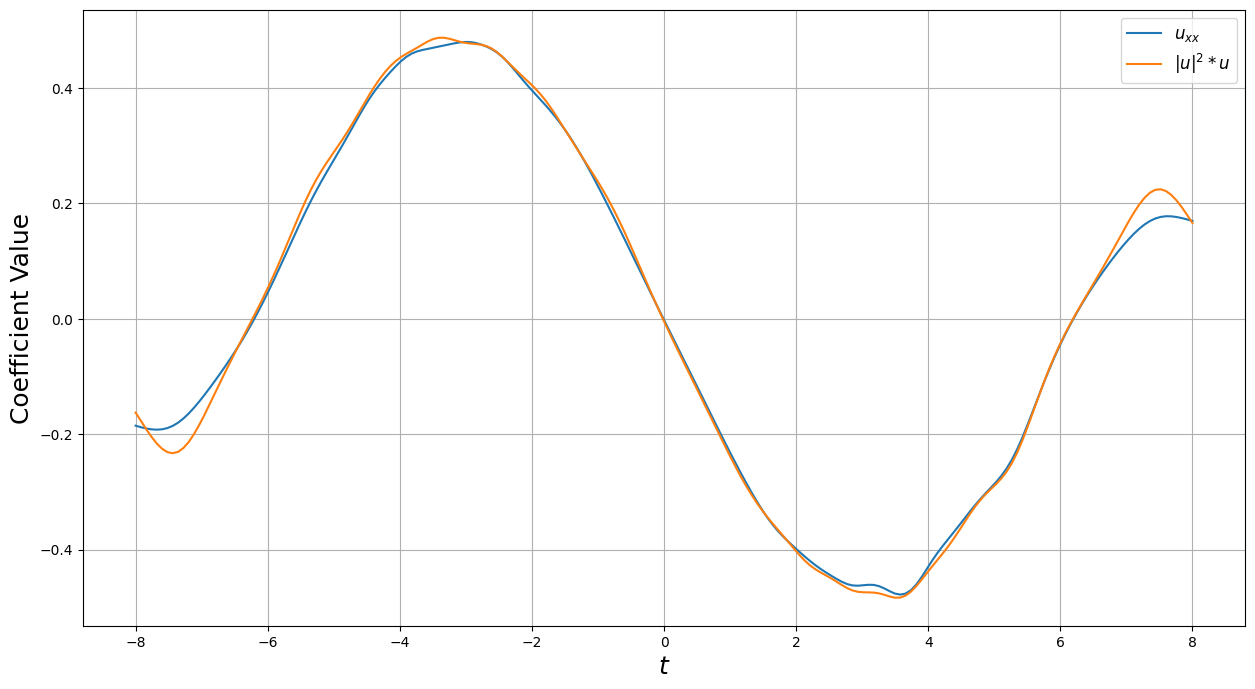

Plot saved as vc_plot/nls1_iter2.pdf


In [7]:
lam = 1e-5
d_tol = 10
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls1_iter2")

In [8]:
model.active_remove_edge(14)

saving model version 0.2


In [10]:
model.fit(input_r, input_k, U_r, steps=100, alpha=1, lam=0., lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls1_iter3')

  0%|          | 0/100 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 100/100 [18:08<00:00, 10.89s/it, loss=-4.73, loss_data=0.00855, loss_pde=0.000244, loss_reg=1.44]


In [11]:
model.kan.auto_symbolic()

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,0,2) with cos, r2=0.998679518699646, c=2
fixing (0,0,3) with 0
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,0,6) with 0
fixing (0,0,7) with 0
fixing (0,0,8) with 0
fixing (0,0,9) with 0
fixing (0,0,10) with 0
fixing (0,0,11) with 0
fixing (0,0,12) with 0
fixing (0,0,13) with 0
fixing (0,0,14) with 0
fixing (0,0,15) with 0
fixing (0,0,16) with cos, r2=0.9987974762916565, c=2
fixing (0,0,17) with 0
fixing (0,0,18) with 0
fixing (0,0,19) with 0
saving model version 0.4


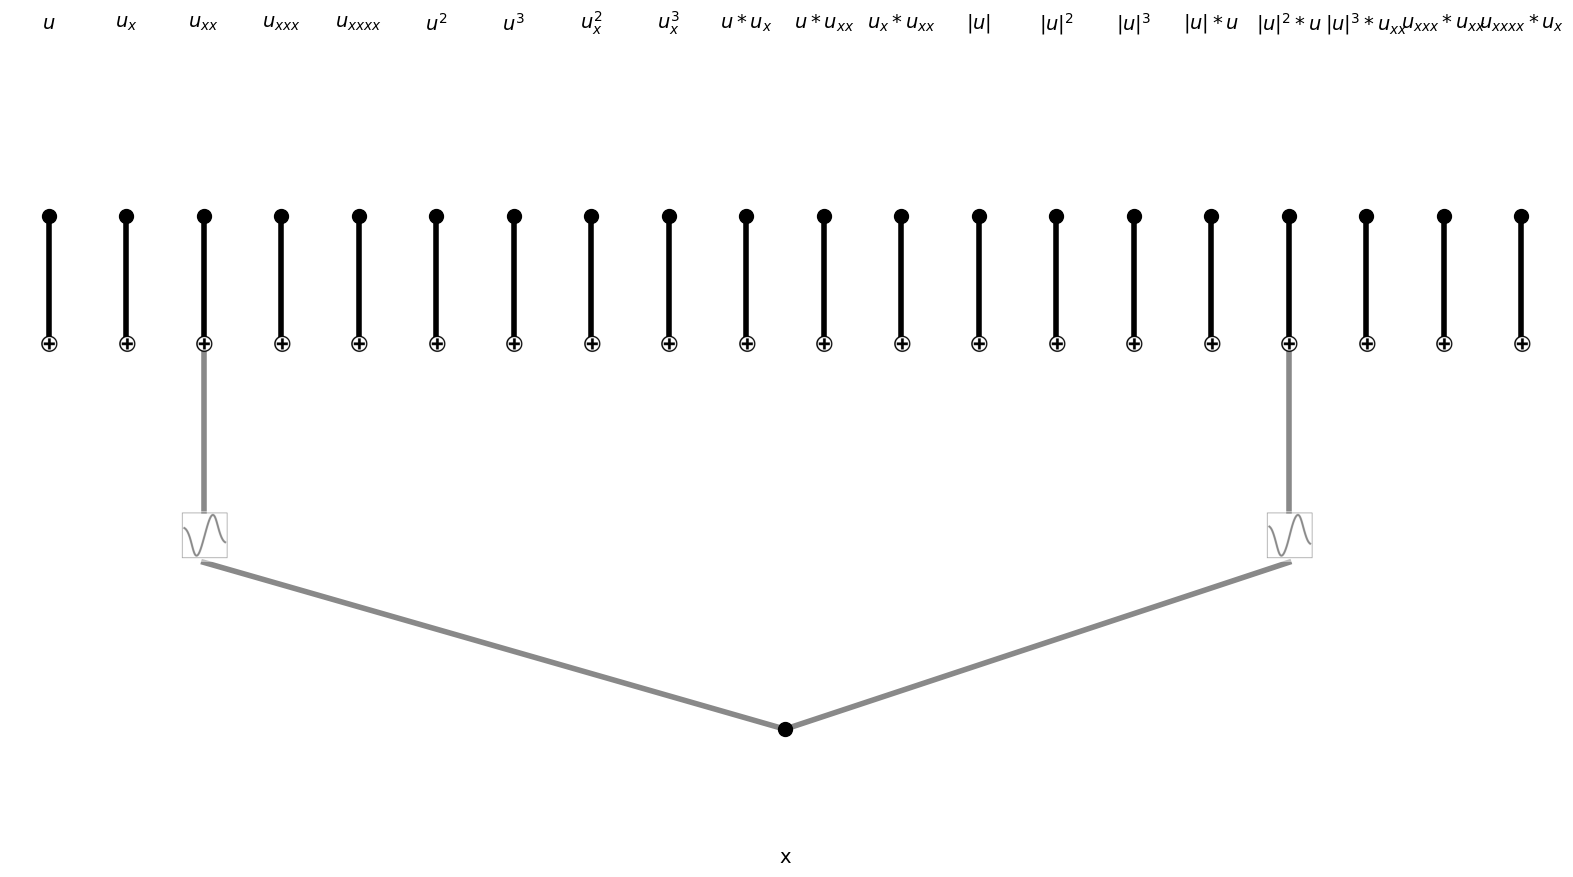

In [9]:
model.kan_plot()

In [13]:
model.fit(input_r, input_k, U_r, steps=50, alpha=1, lam=0.0, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=False, img_folder='./symbolic')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [05:02<00:00,  6.04s/it, loss=-4.74, loss_data=0.0085, loss_pde=0.000219, loss_reg=0.269] 


In [14]:
model.kan.symbolic_formula()[0][2]

-0.500506639480591*cos(0.499232113361359*x_1 + 1.57136034965515) - 0.00130036997143179

In [15]:
model.kan.symbolic_formula()[0][16]

-0.501399397850037*cos(0.499689370393753*x_1 + 1.57232284545898) - 0.00252533098682761

In [11]:
model.forward(input_k)
model.kan.suggest_symbolic(0,0,2)
model.kan.suggest_symbolic(0,0,16)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      cos    0.998680 -9.553836           2                2   -0.310767
1      sin    0.998679 -9.553771           2                2   -0.310754
2        0    0.000000  0.000014           0                0    0.000003
3        x    0.096060 -0.145685           1                1    0.770863
4      exp    0.096086 -0.145726           2                2    1.570855
  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0      cos    0.998797 -9.687771           2                2   -0.337554
1      sin    0.998797 -9.687771           2                2   -0.337554
2        0    0.000000  0.000014           0                0    0.000003
3        x    0.094012 -0.142421           1                1    0.771516
4      exp    0.094038 -0.142462           2                2    1.571508


('cos',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9987974762916565,
 2)